# Growth rate analysis with Bioscreen 100-well Honeycomb or any 96-well plate


# Part 1

This notebook contains workflow to prepare and analyze the results of the microbial growth rate in Bioscreen Honeycomb 100-well plates or any 96-well plate.

### Steps:
1. Install requirements.
2. Import raw data.
3. Prepare raw data for visualization (numpy, pandas).
4. Visualization of growth curves.
5. Usage of [pyphe-growthcurves made by Stephan Kamrad from Bahler Lab](https://github.com/Bahler-Lab/pyphe-growthcurves) for determination of maximal slope of growth curves and time of microbial lag phase.
6. Visualization of max_slope and lap phase on box plots (matplotlib, seaborn).


### Requirements: 
    . numpy >= 1.8.0
    . scipy >= 0.17.0
    . pysam >= 0.8
    . matplotlib >= 1.4.0
    . seaborn
    . pytime
    . parsedatatime
    . pytimeparse

### Install requirements:

In [ ]:
# The file with requirenments is prepared beforehand.
!pip install -r requirements.txt

In [ ]:
# Install other requierments with pip install
!pip install parsedatetime

In [5]:
!pip install pytimeparse

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Using cached https://files.pythonhosted.org/packages/1b/b4/afd75551a3b910abd1d922dbd45e49e5deeb4d47dc50209ce489ba9844dd/pytimeparse-1.1.8-py2.py3-none-any.whl


In [6]:
!pip install pytime

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Using cached https://files.pythonhosted.org/packages/7b/60/e0a9f646a41a5493e64760faacedc45d6916883ea4662cf81f98955bc7d3/pytime-0.2.0.tar.gz
  Stored in directory: /home/lidia/.cache/pip/wheels/ce/b3/0a/3c5be2e5026b7542d6de2d2027440cdda53cfb7cbf795eefab
Successfully built pytime


### Import libraries and modules:

In [13]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as DT
from datetime import timedelta
import parsedatetime
from pytimeparse import parse

%matplotlib inline

### Import metadata file with layout of the plate(s):

Prepare the layour in a separate file , only with the names of samples in the raws and columns as below:

In [32]:
metadata = pd.read_csv("Metadata_layout.csv", sep = ',')
metadata.head()
## Function to look at the head of DataFrame (only first 5 rows):
# metadata.head() 

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20
0,Well1,Well11,Well21,Well31,Well41,Well51,Well61,Well71,Well81,Well91,Well101,Well111,Well121,Well131,Well141,Well151,Well161,Well171,Well181,Well191
1,Well2,Well12,Well22,Well32,Well42,Well52,Well62,Well72,Well82,Well92,Well102,Well112,Well122,Well132,Well142,Well152,Well162,Well172,Well182,Well192
2,Well3,Well4,Well23,Well6,Well7,Well8,Well9,Well10,Well11,Well12,Well4,Well5,Well24,Well7,Well8,Well9,Well10,Well11,Well12,Well13
3,Well4,Well14,Well24,Well34,Well44,Well54,Well64,Well74,Well84,Well94,Well104,Well114,Well124,Well134,Well144,Well154,Well164,Well174,Well184,Well194
4,Well5,Well15,Well25,Well35,Well45,Well55,Well65,Well75,Well85,Well95,Well105,Well115,Well125,Well135,Well145,Well155,Well165,Well175,Well185,Well195


### Import the file with layout prepared beforehand:

In [158]:
metadata = pd.read_csv("Metadata_example_results_dots.csv", sep = ',')
metadata.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20
0,WT_1,WT_1,Blank,WT_etOH.1,WT_etOH.1,Blank,WT_1,WT_1,Blank,WT_etOH.1,WT_1,WT_1,Blank,WT_etOH_1,WT_etOH_1,Blank,WT_1,WT_1,Blank,WT_etOH_1
1,WT_2,WT_2,Blank,WT_etOH.2,WT_etOH.2,Blank,WT_2,WT_2,Blank,WT_etOH.2,WT_2,WT_2,Blank,WT_etOH_2,WT_etOH_2,Blank,WT_2,WT_2,Blank,WT_etOH_2
2,CID1_1,CID1_1,Blank,CID1_etOH.1,CID1_etOH.1,Blank,CID1_1,CID1_1,Blank,CID1_etOH.1,CID1_1,CID1_1,Blank,CID1_etOH_1,CID1_etOH_1,Blank,CID1_1,CID1_1,Blank,CID1_etOH_1
3,CID1_2,CID1_2,Blank,CID1_etOH.2,CID1_etOH.2,Blank,CID1_2,CID1_2,Blank,CID1_etOH.2,CID1_2,CID1_2,Blank,CID1_etOH_2,CID1_etOH_2,Blank,CID1_2,CID1_2,Blank,CID1_etOH_2
4,CID11_1,CID11_1,Blank,CID11_etOH.1,CID11_etOH.1,Blank,CID11_1,CID11_1,Blank,CID11_etOH.1,CID11_1,CID11_1,Blank,CID11_etOH_1,CID11_etOH_1,Blank,CID11_1,CID11_1,Blank,CID11_etOH_1


### This step will make one column with the names of the samples from all columns in the layout:

In [159]:
column_names = pd.concat([metadata[col_name] for col_name in metadata.columns],ignore_index=True)

In [160]:
column_names.head(10)

0       WT_1
1       WT_2
2     CID1_1
3     CID1_2
4    CID11_1
5    CID11_2
6    CID13_1
7    CID13_2
8    CID16_1
9    CID16_2
dtype: object

### Import the raw results and change index (the first row) to the names of the samples: 

In [161]:
## Import raw data:
raw_results_d = pd.read_csv("raw_results_example.csv", sep=';')

## Make a list from your column names :
lista_nowych_nazw=list(column_names)

## Add "Time" to the list:
lista_nowych_nazw=["time"]+lista_nowych_nazw

## Use belowed code if you want to change the name of some sample (here 3rd sample):
# lista_nowych_nazw[3]="Other name"

## Add prepared list with names with your DataFrame containing raw results as the index.
raw_results_d.columns=lista_nowych_nazw


### Preparation of data to obtain DataFrame with desirable format of time:

In [162]:
## Drop column "time" to make new column with time in hours instead of in the format: %H:%M:%S:
raw_results_bezczas = raw_results_d.drop(['time'], axis=1)

## Transpose DataFrame to add column with proper column names from the metadata layout:
cos_nowego = raw_results_bezczas.transpose()

## Make new variable column_times containing column "time" from DataFrame raw_results_d
column_times = raw_results_d['time']

### Use parse function to gain time in secounds from format '%H:%M:%S':
for i in range(len(column_times)):
    column_times[i] = parse(column_times[i], '%H:%M:%S')
    
## Gain time in hours:
for i in range(len(column_times)):
    column_times[i] = column_times[i]/3600.0 
    
## Add column with time in hours to the DataFrame:
indexed = raw_results_bezczas
indexed['Time'] = column_times

## Set collumn tima as the index:
indexed_plus_time = indexed.set_index('Time')

## Export new DataFrame to .csv file:
indexed_plus_time.to_csv("probna_tabelka.csv", sep='\t')

## Check it:
indexed_plus_time.head()

/home/lidia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/lidia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,WT_1,WT_2,CID1_1,CID1_2,CID11_1,CID11_2,CID13_1,CID13_2,CID16_1,CID16_2,...,WT_etOH_1,WT_etOH_2,CID1_etOH_1,CID1_etOH_2,CID11_etOH_1,CID11_etOH_2,CID13_etOH_1,CID13_etOH_2,CID16_etOH_1,CID16_etOH_2
Time,,,,,,,,,,,,,,,,,,,,,
0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


## THE PLOTS

In [163]:
krzywe_Time = indexed_plus_time
krzywe_Time.head()

,WT_1,WT_2,CID1_1,CID1_2,CID11_1,CID11_2,CID13_1,CID13_2,CID16_1,CID16_2,...,WT_etOH_1,WT_etOH_2,CID1_etOH_1,CID1_etOH_2,CID11_etOH_1,CID11_etOH_2,CID13_etOH_1,CID13_etOH_2,CID16_etOH_1,CID16_etOH_2
Time,,,,,,,,,,,,,,,,,,,,,
0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


In [164]:
## Import DataFrame prepared in the previous step: 
krzywe_Time = pd.read_csv("probna_tabelka.csv", sep = "\t")


In [165]:
def przeszukaj(nazwa,colum_names):
    """Return the unique names of columns (samples)
    
    PARAMETERS: 
    
    nazwa (str),
    column_names (df)
    """
    number_of_copies=sum([nazwa in column for column in column_names])
    return number_of_copies 


nazwy_orinalow=[orginal for orginal in column_names if przeszukaj(orginal,column_names)>1]
print(nazwy_orinalow)

['WT_1', 'WT_2', 'CID1_1', 'CID1_2', 'CID11_1', 'CID11_2', 'CID13_1', 'CID13_2', 'CID16_1', 'CID16_2', 'WT_1', 'WT_2', 'CID1_1', 'CID1_2', 'CID11_1', 'CID11_2', 'CID13_1', 'CID13_2', 'CID16_1', 'CID16_2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT_etOH.1', 'WT_etOH.2', 'CID1_etOH.1', 'CID1_etOH.2', 'CID11_etOH.1', 'CID11_etOH.2', 'CID13_etOH.1', 'CID13_etOH.2', 'CID16_etOH.1', 'CID16_etOH.2', 'WT_etOH.1', 'WT_etOH.2', 'CID1_etOH.1', 'CID1_etOH.2', 'CID11_etOH.1', 'CID11_etOH.2', 'CID13_etOH.1', 'CID13_etOH.2', 'CID16_etOH.1', 'CID16_etOH.2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT_1', 'WT_2', 'CID1_1', 'CID1_2', 'CID11_1', 'CID11_2', 'CID13_1', 'CID13_2', 'CID16_1', 'CID16_2', 'WT_1', 'WT_2', 'CID1_1', 'CID1_2', 'CID11_1', 'CID11_2', 'CID13_1', 'CID13_2', 'CID16_1', 'CID16_2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT_etOH.1', 'WT_

In [166]:
column_names= krzywe_Time.columns
column_names
#time = krzywe_Time["Time"]
#time.head()

Index([u'Time', u'WT_1', u'WT_2', u'CID1_1', u'CID1_2', u'CID11_1', u'CID11_2',
       u'CID13_1', u'CID13_2', u'CID16_1',
       ...
       u'WT_etOH_1.2', u'WT_etOH_2.2', u'CID1_etOH_1.2', u'CID1_etOH_2.2',
       u'CID11_etOH_1.2', u'CID11_etOH_2.2', u'CID13_etOH_1.2',
       u'CID13_etOH_2.2', u'CID16_etOH_1.2', u'CID16_etOH_2.2'],
      dtype='object', length=201)

In [167]:
time = krzywe_Time.transpose()
#time = time[1:]
header = time.iloc[0]
time =time.rename(columns = header)
time = time.columns
time


Float64Index([0.00138888888889,   0.192777777778,   0.441666666667,
                0.691388888889,   0.940555555556,    1.19083333333,
                 1.44055555556,    1.69055555556,    1.94055555556,
                 2.19055555556,
              ...
                 23.9408333333,    24.1905555556,    24.4405555556,
                 24.6905555556,    24.9405555556,    25.1905555556,
                 25.4405555556,    25.6905555556,    25.9405555556,
                 26.1905555556],
             dtype='float64', length=106)

In [168]:
########## tutaj jest jakiś klopot ####################



def wyciagnij_wszystkie_powtorzenia(nazwa_orginalu, column_names=column_names):
    '''
    The function makes the dataframe with two columns - OD and Time - for the proper name of column.
    
    PARAMETERS: 
    
    nazwa_orifinalu (str),
    column_names (df)
    '''
    kolumny=np.concatenate([np.array(krzywe_Time[name]) for name in column_names if nazwa_orginalu in name])
    
    czasy=np.concatenate([np.array(time) for name in column_names if nazwa_orginalu in name])
    
    zebrana_dataframe= pd.DataFrame(data={'Time': czasy, "OD":kolumny})
    return zebrana_dataframe

In [107]:
#proba=wyciagnij_wszystkie_powtorzenia(nazwy_orinalow[3])

In [114]:
#proba.head()

,OD,Time
0,0.098,0.001389
1,0.109,0.192778
2,0.119,0.441667
3,0.104,0.691389
4,0.098,0.940556


In [169]:
## Make a list with the names of major groups of saples - the samples will be grouped by the names.

## We create above the list of names of strains (wild type WT, and deletion strains)

mozliwe_szczepy=['WT', 'CID11','CID13','CID16','CID1','Blank']

def zrob_nowe_wiersze(column_name):
    '''
    The function makes new dafaframe with new columns: 
        -- "strain" with extracted strain name from the sample name, 
        -- "name" with the column name = the names corresponds the sample names in the layout table.
        
    PARAMETERS:
    column_name (str)
    mozliwe_szczepy (list)

    '''
    proba=wyciagnij_wszystkie_powtorzenia(column_name)
    
    przed_p_kropka=column_name.split(".")[0]
    
    
    proba["strain"]=next(szczep for szczep in mozliwe_szczepy if szczep in przed_p_kropka)
    proba["name"]=column_name
    return proba

# Let's use the previous function to make a data frame of results for a single strain (lista_nowy_df).  
lista_nowy_df=[zrob_nowe_wiersze(column_name) for column_name in nazwy_orinalow]

# Concatenate the data frames.
splaszczony_df=pd.concat(lista_nowy_df)

## Growth curves for every strain (wild type and deletion mutants)

WT
CID11
CID13
CID16
CID1


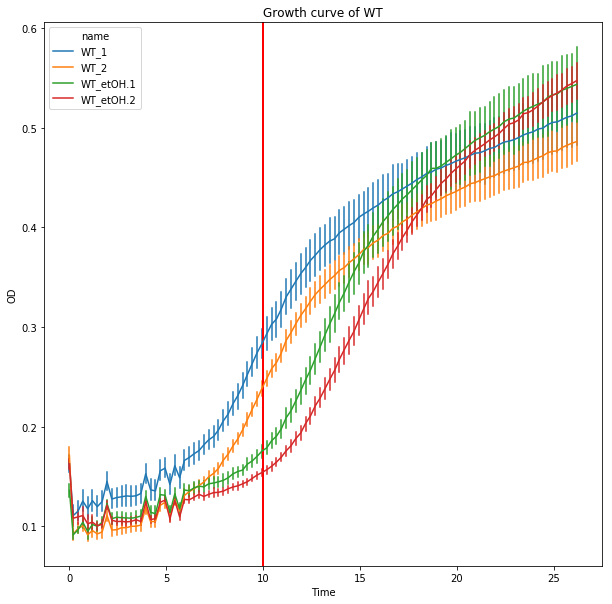

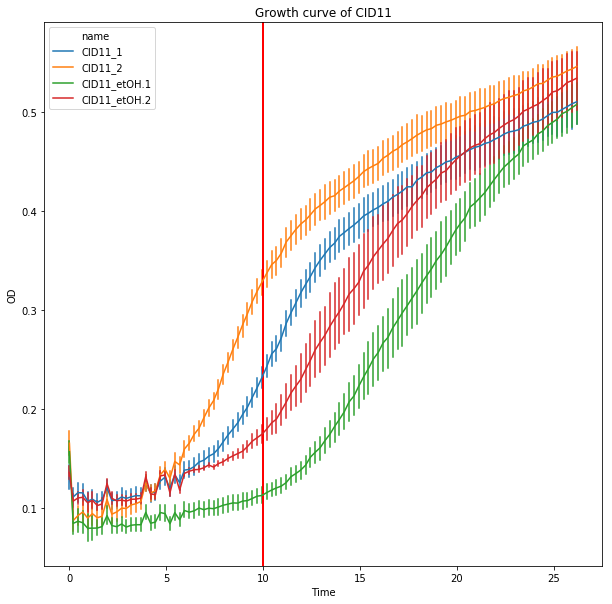

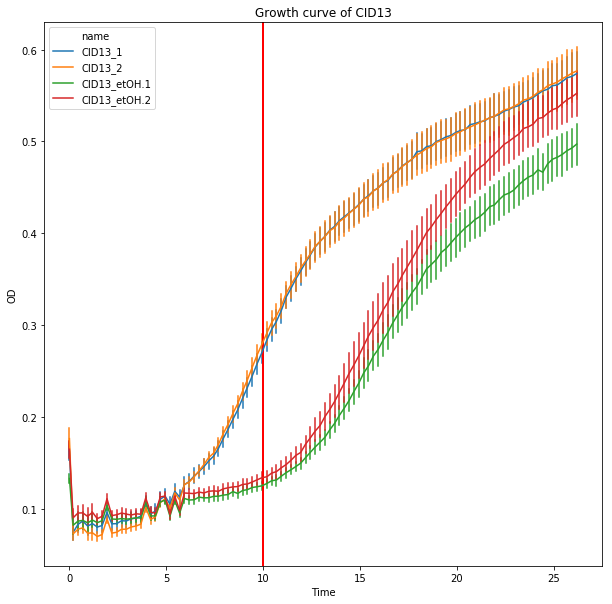

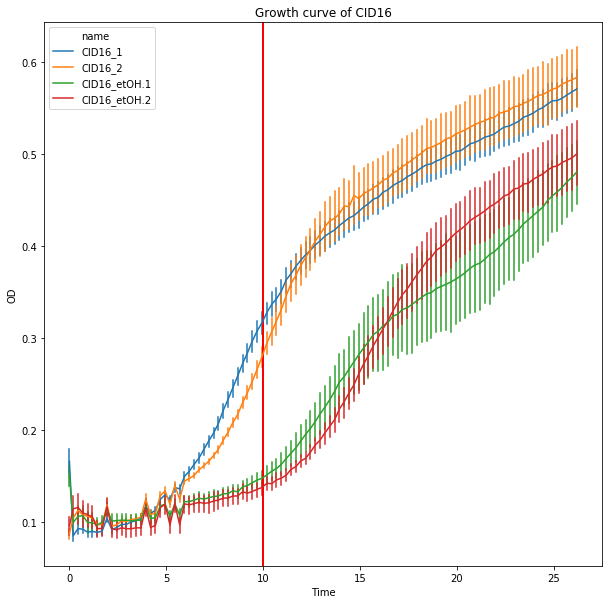

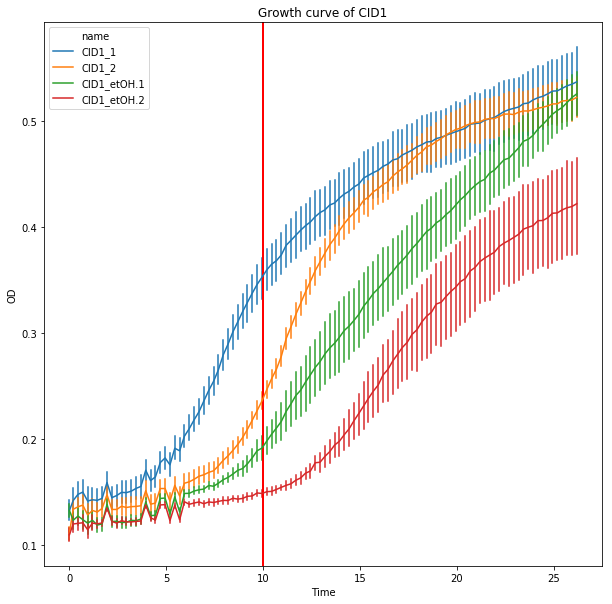

In [123]:
for szczep_name in mozliwe_szczepy:
    ''' 
    It makes the plots (the growth curves) for each groups of samples,
    according to list "mozliwe szczepy".
    
    All plots have the same style, and are saved as pdf and png files. 
    '''
    print(szczep_name)
    tylko_szczep_32=splaszczony_df[splaszczony_df["strain"]==szczep_name]
    f = plt.figure(figsize=(10,10))
    plt.title("Growth curve of {}".format(szczep_name))
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(x="Time", y="OD", data=tylko_szczep_32, hue="name",err_style="bars")
    f.savefig("plots/{}_1.png".format(szczep_name))   #Save the figure as .pdf. or .png file
    f.savefig("plots/{}_1.pdf".format(szczep_name))   #Save the figure as .pdf. or .png file

## Summary of results the matrix of growth curves

### Error style = "bars"

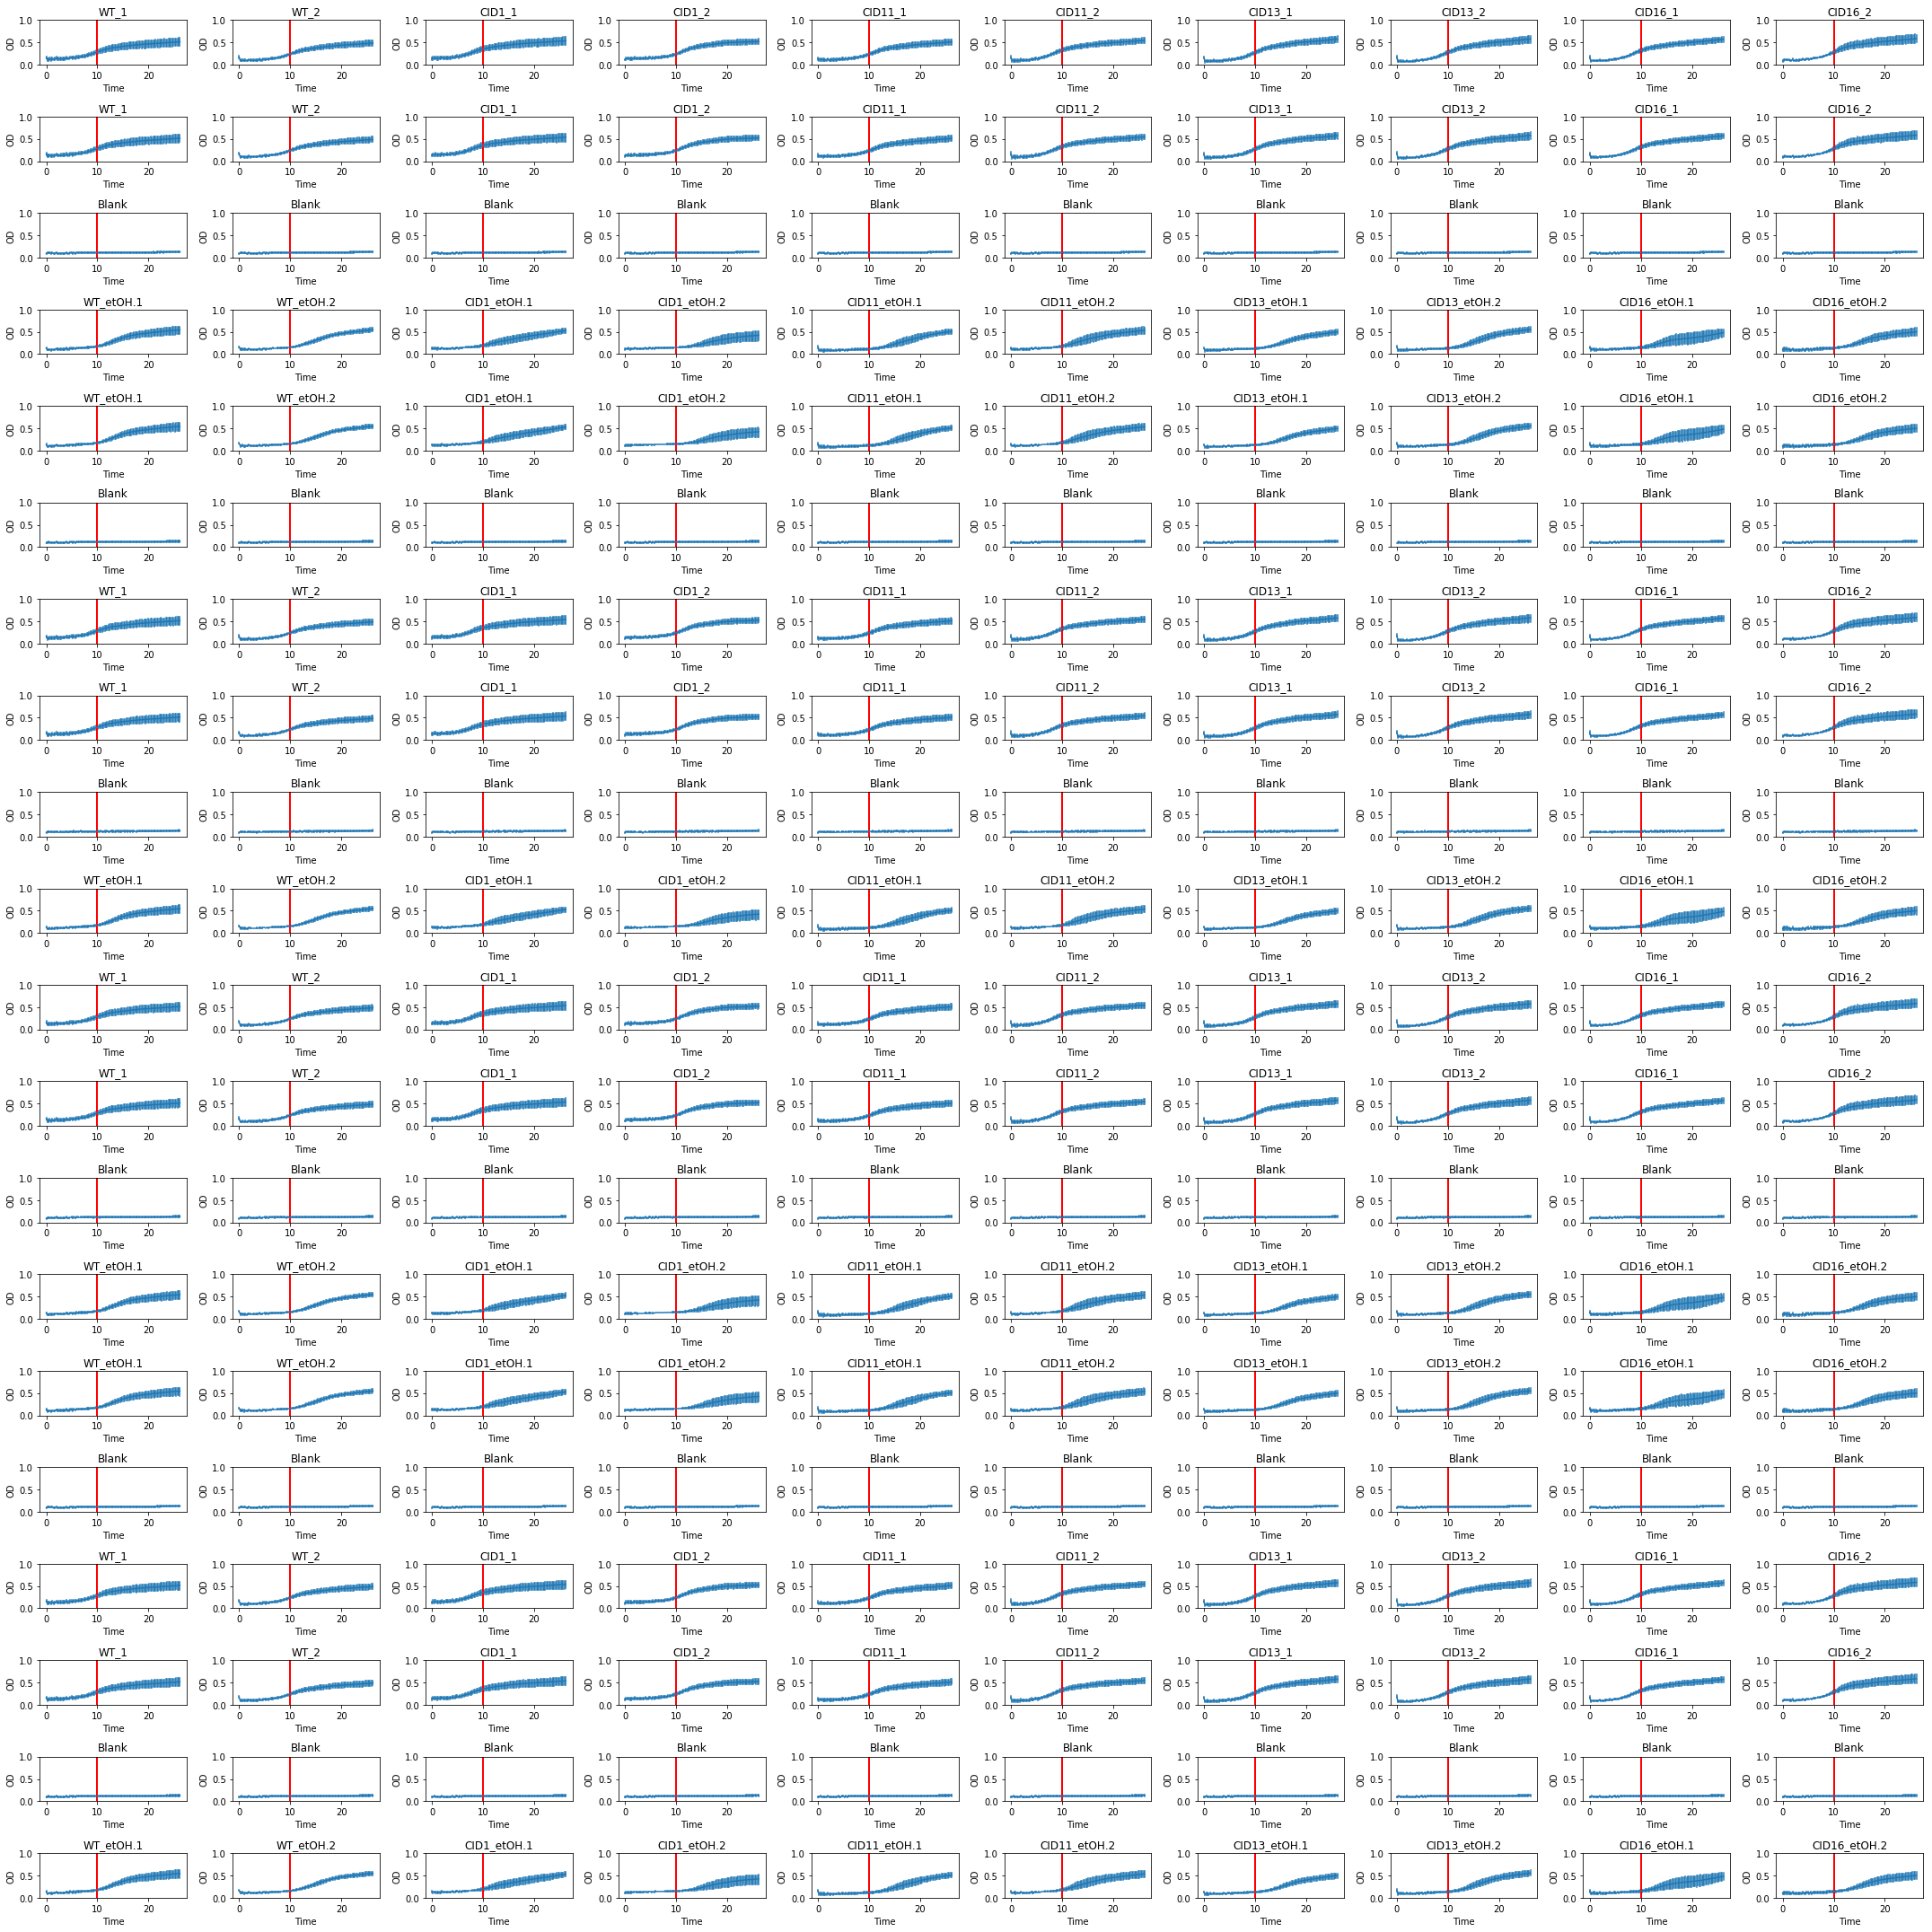

In [111]:
f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
     ''' 
    It makes the plots matrix of growth curves contaning mean of technical repeats and spread of results.
    
    The matrix of plots is saved as pdf and png files.
    
    Error style = "bars"
    '''
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20,10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="bars")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("plots/all_figures_mean.pdf")   #Save the figure as .pdf. or .png file
f.savefig("plots/all_figures_mean.png")   #Save the figure as .pdf. or .png file

### Error style = "band"

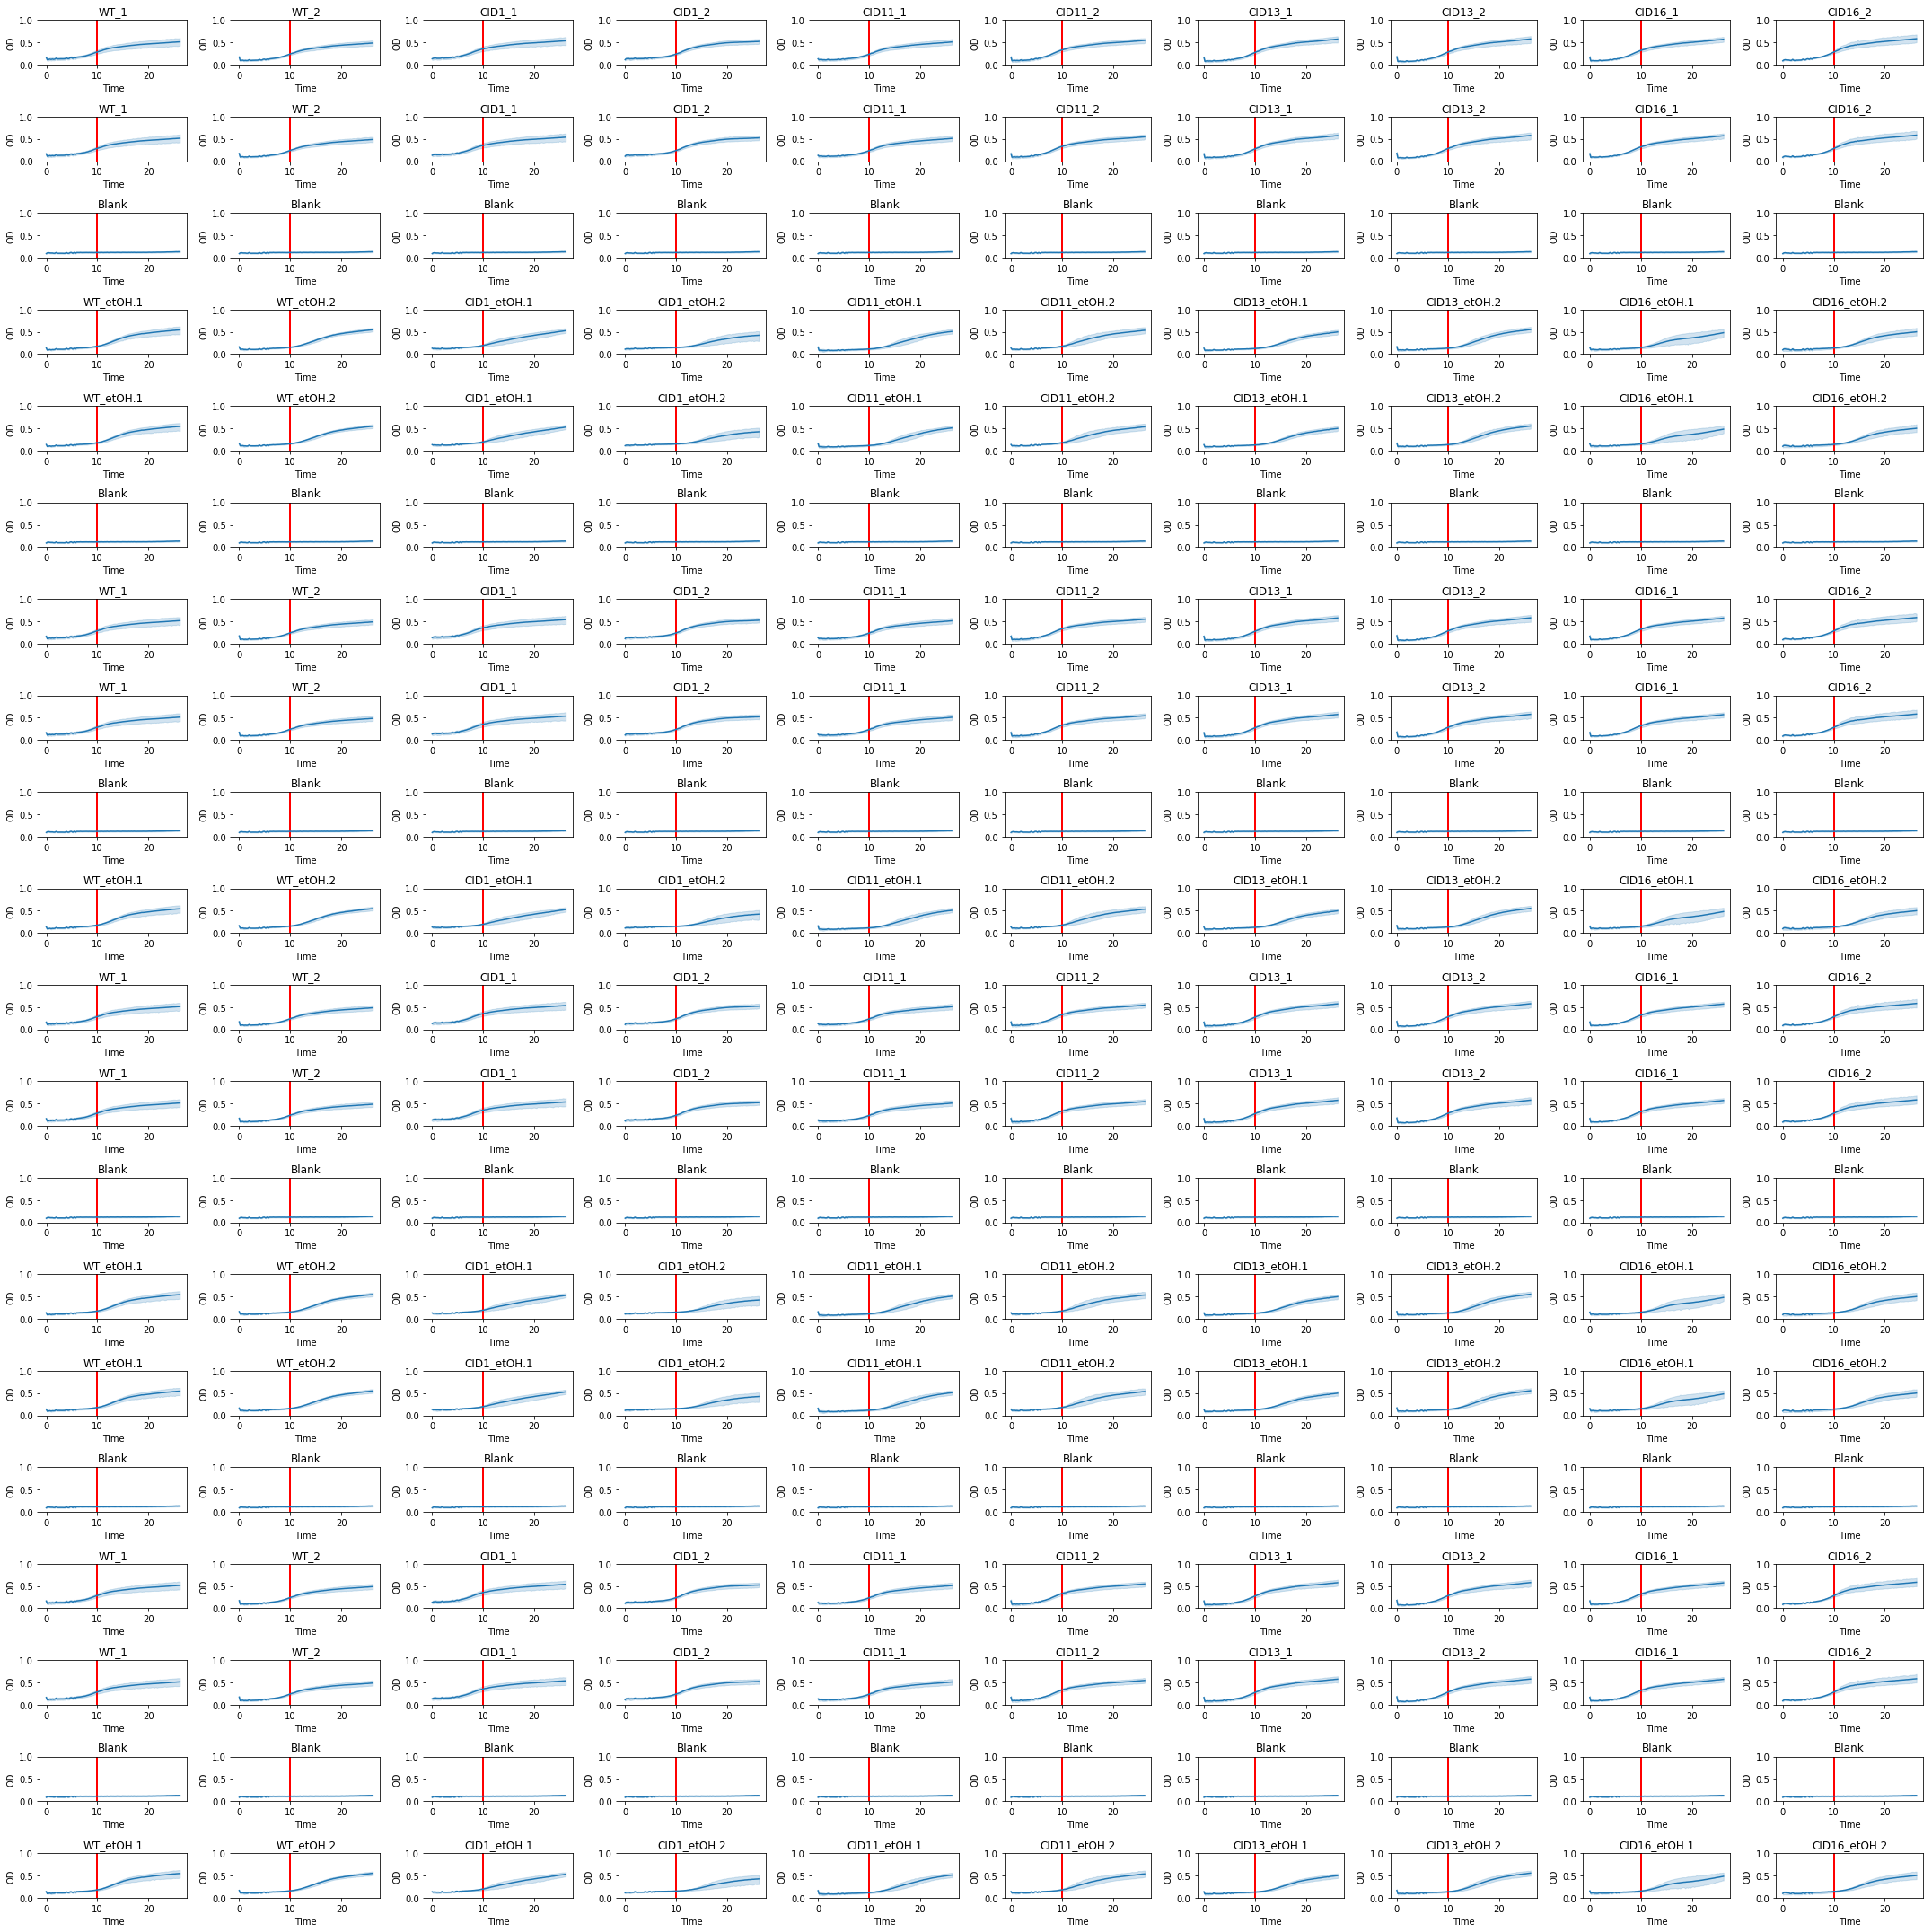

In [112]:
f = plt.figure(figsize=(30,30))
   ''' 
    It makes the plots matrix of growth curves plots contaning mean of technical repeats and spread of results.
    
    The matrix of plots is saved as pdf and png files. 
    
    Error style = "band"
    '''

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="band")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("plots/all_figures_errorstyle_band.pdf")    #Save the figure as .pdf. or .png file
f.savefig("plots/all_figures_errorstyle_band.png")    #Save the figure as .pdf. or .png file

## The matrix with raw results of growthcurves in every well on 100-well plate to show the fluctuations on the plate 

In [170]:
column_names= krzywe_Time.columns
time=krzywe_Time["Time"]

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(column_names[1:]):
       ''' 
    It makes the growth curves of each technical repeat on the plate.
    
    The matrix of plots is saved as pdf and png files. 
    
    '''
    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
#    plt.ylim([0,0.8])
    plt.axvline(x=10, linewidth=2, color='r')
    plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
f.savefig("plots/all_figures_separately.pdf")    #Save the figure as .pdf. or .png file
f.savefig("plots/all_figures_separately.png")    #Save the figure as .pdf. or .png file

IndentationError: unindent does not match any outer indentation level (<ipython-input-170-ff3f91cb49f1>, line 14)

# Analyze lag phase and the maximum slope
Use **pyphe-growthcurves** Python module for on-parametric characterisation of microbial growth curves written by Stephan Kamrad (stephan.kamrad@crick.ac.uk).
Source and code: https://github.com/Bahler-Lab/pyphe-growthcurves

### Preparation of DataFrame for Pyphe-growthcurves analysis:

In [171]:
## Take DataFrame prepared earlier, drop comumn name "Time", and export new DataFrame to .csv file:
table_for_pyphe = indexed_plus_time
table_for_pyphe.index.names = ['Time']
#table_for_pyphe(0,0) = "Time"
table_for_pyphe.to_csv('pyphe_table_1.csv', sep = ',') #Data in DataFrame should be separated wit ","

table_for_pyphe.head()

,WT_1,WT_2,CID1_1,CID1_2,CID11_1,CID11_2,CID13_1,CID13_2,CID16_1,CID16_2,...,WT_etOH_1,WT_etOH_2,CID1_etOH_1,CID1_etOH_2,CID11_etOH_1,CID11_etOH_2,CID13_etOH_1,CID13_etOH_2,CID16_etOH_1,CID16_etOH_2
Time,,,,,,,,,,,,,,,,,,,,,
0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


### Make the analysis according to the https://github.com/Bahler-Lab/pyphe-growthcurves. 

#### As a result you will obtain two files: 
1. The pdf file with growth curves with max_slope and lagphase.
2. The csv file with numerical results such as: max_slope, lag phase, initial biomass and other.

__Example Input:__

pyphe_table_1.csv

__Example Output:__
1. pyphe_table_1_curves.pdf
2. pyphe_table_1_results.csv

In [172]:
#Pyphe growthcurves
!python pyphe-growthcurves.py --input pyphe_table_1.csv --plots

Analysis done: pyphe_table_1.csv


In [174]:
pyphe_results = pd.read_csv('pyphe_table_1_results.csv', sep = ',', index_col=0)
pyphe_results

,WT_1,WT_2,CID1_1,CID1_2,CID11_1,CID11_2,CID13_1,CID13_2,CID16_1,CID16_2,...,WT_etOH_1.2,WT_etOH_2.2,CID1_etOH_1.2,CID1_etOH_2.2,CID11_etOH_1.2,CID11_etOH_2.2,CID13_etOH_1.2,CID13_etOH_2.2,CID16_etOH_1.2,CID16_etOH_2.2
initial biomass,0.121333,0.122333,0.128333,0.119667,0.110000,0.106667,0.071667,0.080667,0.083333,0.095000,...,0.114333,0.138667,0.141667,0.131333,0.121333,0.136000,0.129667,0.139333,0.157667,0.142000
lag,22.440556,11.690556,17.190833,11.190833,11.190833,8.940556,8.440556,9.690556,8.690556,8.940556,...,11.940556,14.940556,16.441111,20.940556,19.940556,17.690556,17.190833,15.941667,13.690556,14.190556
max_slope,0.042816,0.037213,0.176492,0.047211,0.074141,0.041215,0.042014,0.040814,0.035612,0.076993,...,0.060400,0.055995,0.037083,0.049600,0.062400,0.039213,0.032000,0.058440,0.052800,0.058606
r2,0.814663,0.863633,0.763469,0.869257,0.731846,0.988314,0.997286,0.883223,0.993259,0.706393,...,0.992427,0.994407,0.986009,0.990722,0.919033,0.998346,0.984615,0.996099,0.994521,0.999775
t_max,4.565764,1.565625,0.331806,0.331806,0.331806,8.065764,11.065764,4.565764,8.565625,0.331806,...,14.315556,15.816736,15.316250,20.815556,20.315556,17.565625,17.815556,16.566111,14.065556,15.316250
y-intercept,-0.065239,0.050988,0.084189,0.108335,0.090900,-0.143679,-0.225667,-0.113849,-0.135292,0.074703,...,-0.506910,-0.557655,-0.321726,-0.766452,-0.994691,-0.420305,-0.290598,-0.648118,-0.405661,-0.547874
x-intercept,1.523699,-1.370175,-0.477015,-2.294678,-1.226043,3.486099,5.371234,2.789426,3.799027,-0.970255,...,8.392542,9.959052,8.675777,15.452652,15.940556,10.718449,9.081181,11.090378,7.682980,9.348430


In [176]:
wyniki_pyphe_transposed = pyphe_results.transpose()
#wyniki_pyphe_transposed = wyniki_pyphe_transposed.drop(['Time.1'])

## Add column Mutant beeing a copy of the index of the DataFrame:
wyniki_pyphe_transposed["Mutant"] = wyniki_pyphe_transposed.index
wyniki_pyphe_transposed_withoutblank = wyniki_pyphe_transposed[~wyniki_pyphe_transposed.Mutant.str.contains("Blank")]

wyniki_pyphe_transposed_withoutblank.tail()

,initial biomass,lag,max_slope,r2,t_max,y-intercept,x-intercept,Mutant
CID11_etOH_2.2,0.136000,17.690556,0.039213,0.998346,17.565625,-0.420305,10.718449,CID11_etOH_2.2
CID13_etOH_1.2,0.129667,17.190833,0.032000,0.984615,17.815556,-0.290598,9.081181,CID13_etOH_1.2
CID13_etOH_2.2,0.139333,15.941667,0.058440,0.996099,16.566111,-0.648118,11.090378,CID13_etOH_2.2
CID16_etOH_1.2,0.157667,13.690556,0.052800,0.994521,14.065556,-0.405661,7.682980,CID16_etOH_1.2
CID16_etOH_2.2,0.142000,14.190556,0.058606,0.999775,15.316250,-0.547874,9.348430,CID16_etOH_2.2


In [180]:
wyniki_pyphe_transposed.tail()

,initial biomass,lag,max_slope,r2,t_max,y-intercept,x-intercept,Mutant
CID11_etOH_2.2,0.136000,17.690556,0.039213,0.998346,17.565625,-0.420305,10.718449,CID11_etOH_2.2
CID13_etOH_1.2,0.129667,17.190833,0.032000,0.984615,17.815556,-0.290598,9.081181,CID13_etOH_1.2
CID13_etOH_2.2,0.139333,15.941667,0.058440,0.996099,16.566111,-0.648118,11.090378,CID13_etOH_2.2
CID16_etOH_1.2,0.157667,13.690556,0.052800,0.994521,14.065556,-0.405661,7.682980,CID16_etOH_1.2
CID16_etOH_2.2,0.142000,14.190556,0.058606,0.999775,15.316250,-0.547874,9.348430,CID16_etOH_2.2


In [179]:
for column in range(1,wyniki_pyphe_transposed.size):
    wyniki_pyphe_transposed["Strain"][column] =wyniki_pyphe_transposed["Mutant"][column].split("_")[0]
wyniki_pyphe_transposed.head()

#przed_p_kropka=column_name.split(".")[0]
#string.split(separator, max)

KeyError: 'Strain'

In [ ]:
for name in names:
    

In [150]:
wyniki_pyphe_transposed["Strain"] =wyniki_pyphe_transposed["Mutant"].split("_")[0]
wyniki_pyphe_transposed

AttributeError: 'Series' object has no attribute 'split'

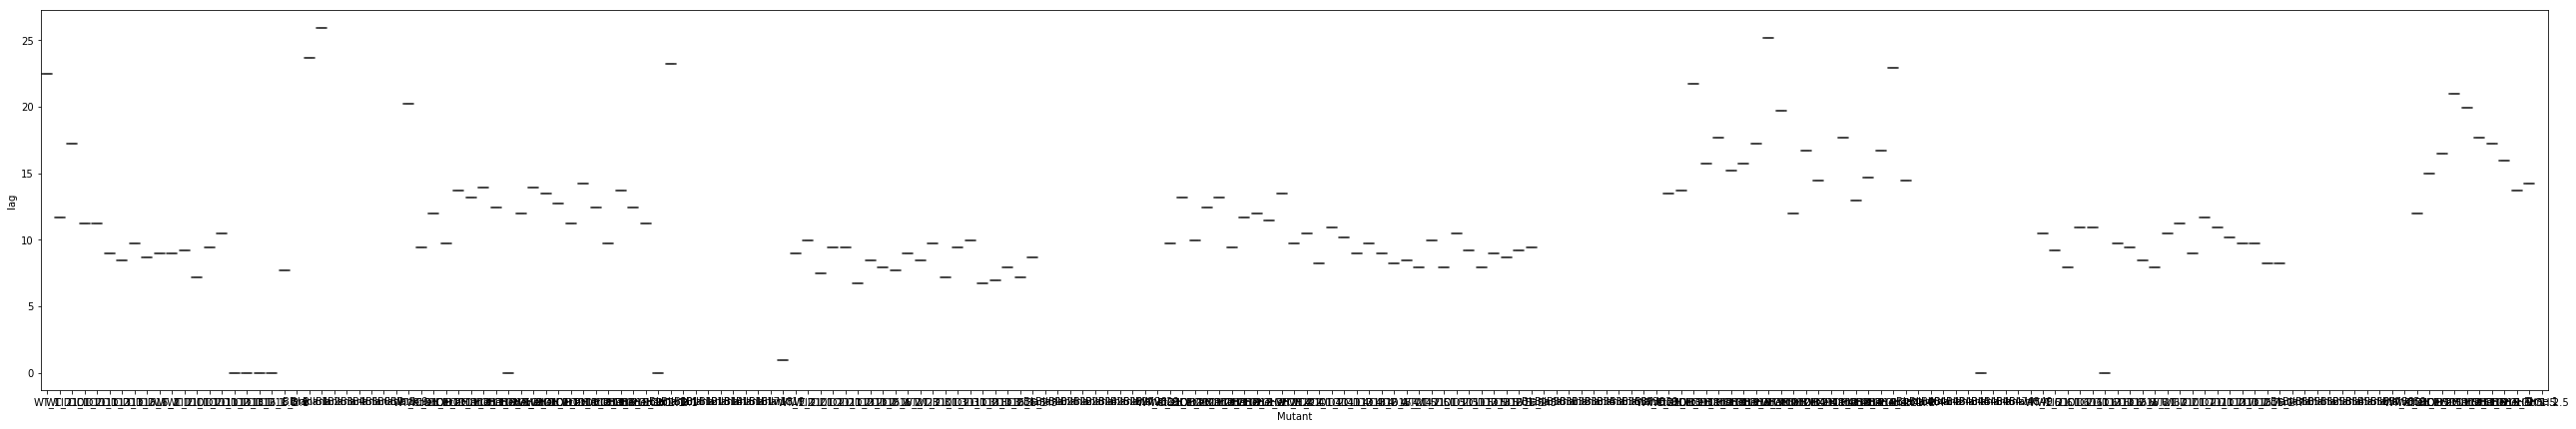

In [140]:
# lagfaza
f = plt.figure(figsize=(45,7))
sns.boxplot(x = wyniki_pyphe_transposed["Mutant"],y=wyniki_pyphe_transposed["lag"])
#f.savefig("pyphe_lag_stres_20190517.png")

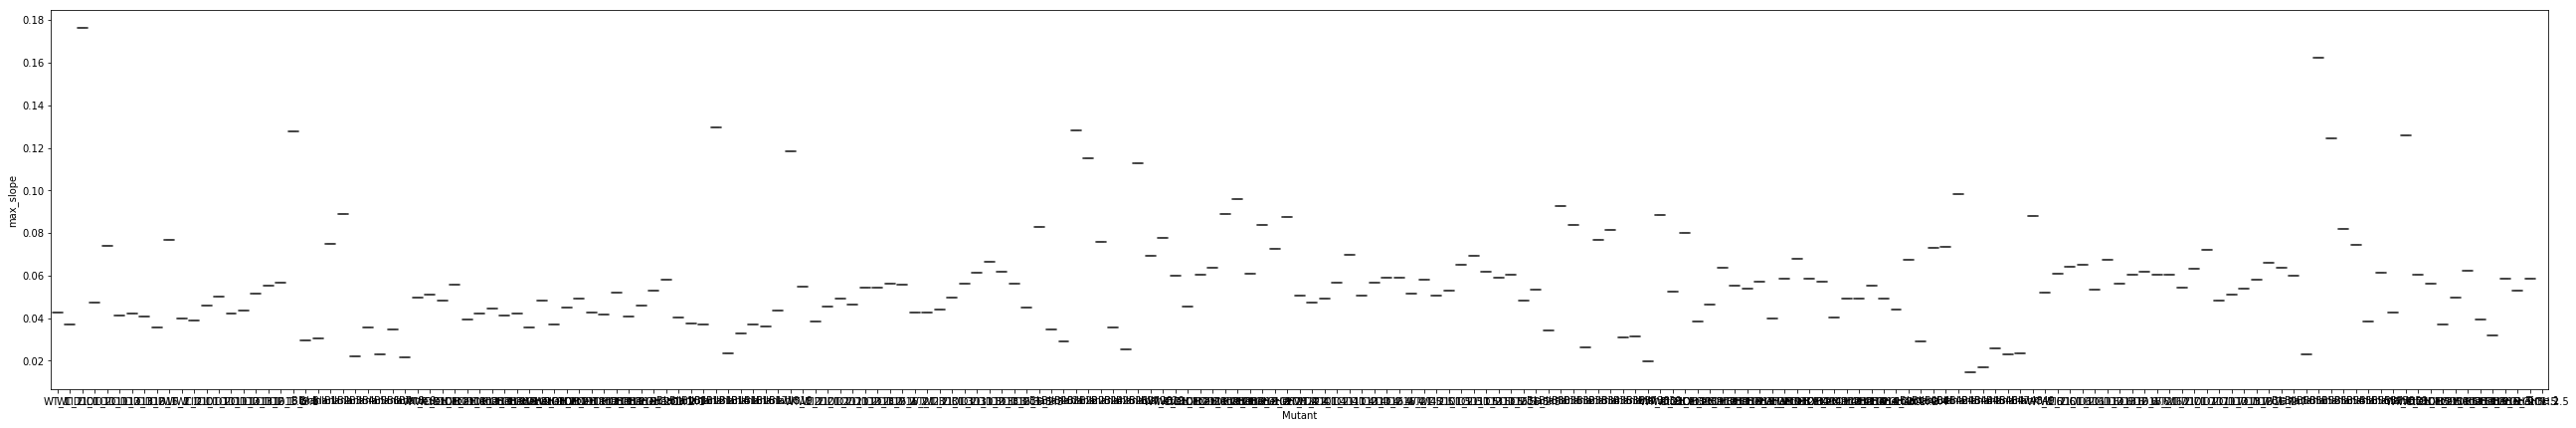

In [141]:
# max_slope
f = plt.figure(figsize=(45,7))
sns.boxplot(x = wyniki_pyphe_transposed["Mutant"],y=wyniki_pyphe_transposed["max_slope"])
#f.savefig("pyphe_max_slope_stres_20190517.png")

## Next step: Visualization
### Let's look at __[Bioscreen_results_part2_heatmap.ipynb](./Bioscreen_results_part2/Bioscreen_results_part2_heatmap.ipynb)__.